In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1번 
데이터 출처 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv 일부 전처리    
데이터 경로 : /kaggle/input/adp-kr-p3/problem1.csv     
데이터 설명 : 집과 관련된 여러 수치들과 집의 가격, log1p 정규화된 price 컬럼 예측 하기 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1-1 EDA 및 데이터 전처리
시각화 및 통계량 제시

In [76]:
data1 = pd.read_csv('./data/problem1.csv')
data1.head()

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
0,1,8450,65.0,2003,856,854,2003,8,1,3,2,548,12.247699
1,2,9600,80.0,1976,1262,0,1976,6,1,3,2,460,12.109016
2,3,11250,68.0,2001,920,866,2002,6,1,3,2,608,12.317171
3,4,9550,60.0,1915,961,756,1970,7,1,3,3,642,11.849405
4,5,14260,84.0,2000,1145,1053,2000,9,1,4,3,836,12.429220


In [77]:
print("\n==info 확인=="), data1.info(), print('\n==결측치 확인=='), data1.isnull().sum()


==info 확인==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB

==결측치 확인==


(None,
 None,
 None,
 Id                0
 LotArea           0
 LotFrontage     259
 YearBuilt         0
 1stFlrSF          0
 2ndFlrSF          0
 YearRemodAdd      0
 TotRmsAbvGrd      0
 KitchenAbvGr      0
 BedroomAbvGr      0
 GarageCars        0
 GarageArea        0
 price             0
 dtype: int64)

- 총 13개의 컬럼으로 구성된 데이터이며, datatype은 int와 float로 구성되어있다.
    - 하지만 데이터를 살펴보았을 때, 범주형 변수로 처리할 수 있는 컬럼들이 있을수도 있을 것으로 보인다.
- LotFrotage 변수에 결측치가 있는 것으로 보인다. 

In [78]:
data1['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [79]:
data1['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [80]:
from scipy.stats import mode
print('평균치 =',np.mean(data1['LotFrontage']))

평균치 = 70.04995836802665


- 두번 째 최빈값과 평균치가 거의 비슷하기 때문에, LotFronttage 컬럼의 결측치를 평균치로 70으로 대체해도 된다고 판단하였다.

In [81]:
data1.fillna(70,inplace=True)

In [82]:
data1.isnull().sum()

Id              0
LotArea         0
LotFrontage     0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
YearRemodAdd    0
TotRmsAbvGrd    0
KitchenAbvGr    0
BedroomAbvGr    0
GarageCars      0
GarageArea      0
price           0
dtype: int64

In [83]:
data1.describe()

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,70.041096,1971.267808,1162.626712,346.992466,1984.865753,6.517808,1.046575,2.866438,1.767123,472.980137,12.024057
std,421.610009,9981.264932,22.024031,30.202904,386.587738,436.528436,20.645407,1.625393,0.220338,0.815778,0.747315,213.804841,0.399449
min,1.000000,1300.000000,21.000000,1872.000000,334.000000,0.000000,1950.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,365.750000,7553.500000,60.000000,1954.000000,882.000000,0.000000,1967.000000,5.000000,1.000000,2.000000,1.000000,334.500000,11.775105
50%,730.500000,9478.500000,70.000000,1973.000000,1087.000000,0.000000,1994.000000,6.000000,1.000000,3.000000,2.000000,480.000000,12.001512
75%,1095.250000,11601.500000,79.000000,2000.000000,1391.250000,728.000000,2004.000000,7.000000,1.000000,3.000000,2.000000,576.000000,12.273736
max,1460.000000,215245.000000,313.000000,2010.000000,4692.000000,2065.000000,2010.000000,14.000000,3.000000,8.000000,4.000000,1418.000000,13.534474


- 통계를 살펴보았을 때, TotRmsAbvGrd, KitchenAbvGr, BedroomAbvGr, GarageCars 등의 변수는 범주형으로 처리해야 될 것으로 보인다.
- 또한 Id 컬럼은 제거하거나 index 처리한다.(수치적으로 의미 x)

In [84]:
# id 컬럼 제거
data1 = data1.drop('Id',axis=1)

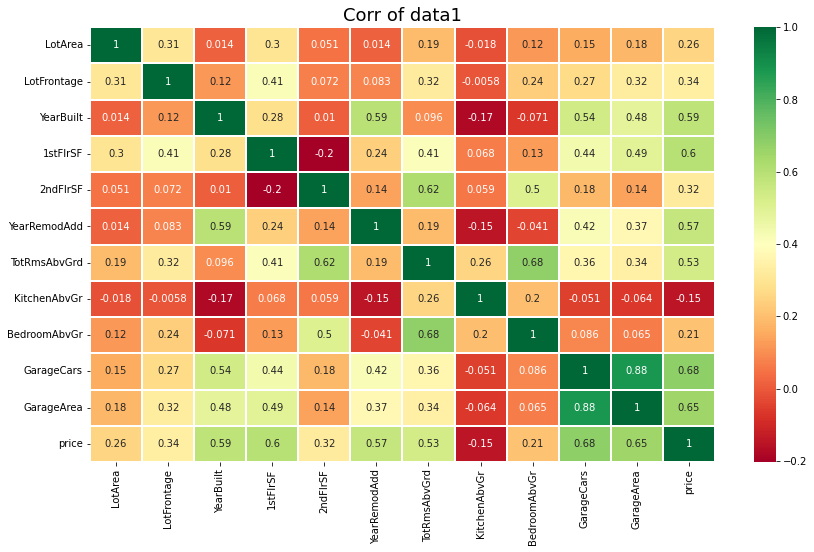

In [85]:
# 상관분석 - 히트맵 시각화
corr = data1.corr()
plt.figure(figsize=(14, 8))
# 그래프 타이틀
plt.title('Corr of data1', fontsize=18)
#  Co-relation 매트릭스 런칭
sns.heatmap(corr, annot=True ,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':10})
plt.show()

- price 변수와 상관관계가 높은 변수는 GarageCars(0.68), GarageArea(0.65), 1stFirSF(0.6), YearBulit(0.59), YearRemodAdd(0.57), TotRmsAbcGrd(0.53) 등이 있다.
- GarageArea와 GarageCars는 0.88의 높은 상관관계를 보인다.

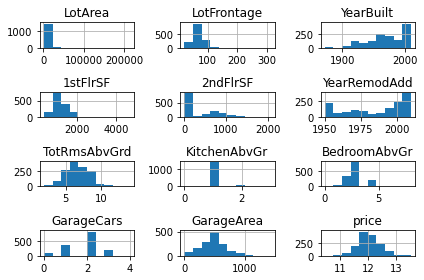


==TotRmsAbcGrd 변수 values==


6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

In [86]:
data1.hist()
plt.tight_layout() # 플롯 겹침 방지
plt.show()
print('\n==TotRmsAbcGrd 변수 values==')
data1['TotRmsAbvGrd'].value_counts()

- GarageArea, TotRmsAbcGrd, price 등을 제외하고는 정규분포 모양에 가까운 모양을 가지지 않는다.
    - 즉, 회귀분석 전에 따로 스케일링을 진행해 주는것이 좋다.
- 위에서 확인했을때, TotRmsAbvGrd, KitchenAbvGr, BedroomAbvGr, GarageCars 등의 변수를 범주형으로 처리해야 된다고 보았지만, TotRmsAbcGrd 변수는 종류가 12가지 존재하고 정규분포에 가까운 분포를 가지므로 연속형 변수로 처리해도 될 것으로 보인다.
    - 즉, KitchenAbvGr, BedroomAbvGr, GarageCars등의 변수를 범주형으로 처리한다.

#### KitchenAbvGr, BedroomAbvGr, GarageCars등의 변수를 범주형으로 처리

In [87]:
encoding_columns = ['KitchenAbvGr', 'BedroomAbvGr', 'GarageCars']

encoding_data = pd.get_dummies(data1, columns = encoding_columns)
encoding_data

,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,GarageArea,price,KitchenAbvGr_0,...,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
0,8450,65.0,2003,856,854,2003,8,548,12.247699,0,...,1,0,0,0,0,0,0,1,0,0
1,9600,80.0,1976,1262,0,1976,6,460,12.109016,0,...,1,0,0,0,0,0,0,1,0,0
2,11250,68.0,2001,920,866,2002,6,608,12.317171,0,...,1,0,0,0,0,0,0,1,0,0
3,9550,60.0,1915,961,756,1970,7,642,11.849405,0,...,1,0,0,0,0,0,0,0,1,0
4,14260,84.0,2000,1145,1053,2000,9,836,12.429220,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,1999,953,694,2000,7,460,12.072547,0,...,1,0,0,0,0,0,0,1,0,0
1456,13175,85.0,1978,2073,0,1988,7,500,12.254868,0,...,1,0,0,0,0,0,0,1,0,0
1457,9042,66.0,1941,1188,1152,2006,9,252,12.493133,0,...,0,1,0,0,0,0,1,0,0,0
1458,9717,68.0,1950,1078,0,1996,5,240,11.864469,0,...,0,0,0,0,0,0,1,0,0,0


### 1-2  Train,Valid,Test set으로 분할 및 시각화 제시

In [88]:
feature_columns = list(data1.columns.difference(['price']))

X = data1[feature_columns]
y = data1['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1022, 11), (1022,), (438, 11), (438,))

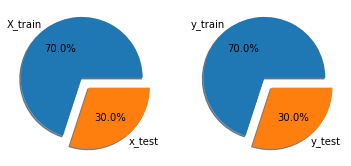

In [195]:
# 분할 모습 시각화
plt.subplots
plt.subplot(1,2,1).pie([len(X_train),len(X_test)], explode = (0.1,0.1),
         labels = ['X_train','x_test'], autopct='%1.1f%%',
         shadow = True,)
plt.subplot(1,2,2).pie([len(y_train),len(y_test)], explode = (0.1,0.1),
         labels = ['y_train','y_test'], autopct='%1.1f%%',
         shadow = True)
plt.show()

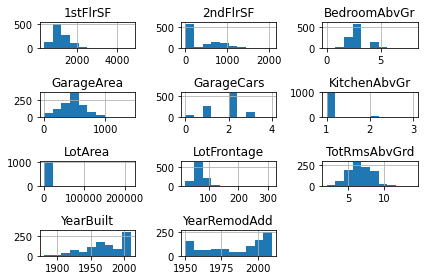

In [89]:
X_train.hist()
plt.tight_layout()
plt.show()

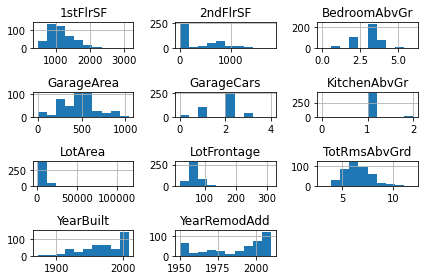

In [90]:
X_test.hist()
plt.tight_layout()
plt.show()

- train,test data가 랜덤하고 비슷하게 잘 split 된 것을 확인할 수 있다.

### 1-3  2차 교호작용항 까지 고려한 회귀분석 수행 및 변수 선택 과정 제시

#### 변수선택 과정(R 활용)

In [91]:
data1.to_csv('data1.csv',index=False)

```r
# 데이터 불러오기
data1 <- read.csv('data1.csv')
head(data1)
str(data1)

# full.model 과 min.model
full.model <- lm(price~., data=data1) #모든 변수 포함 모델

# 변수선택법 - 단계적선택법
stepwise.model <- step(full.model, direction='both')
formula(stepwise.model)
length(names(stepwise.model$model))
summary(stepwise.model
```

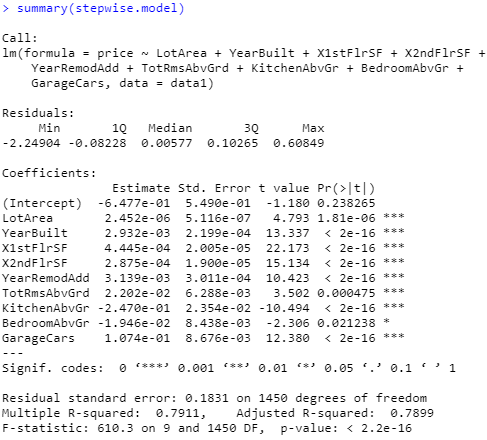

- R을 활용하여 변수선택법을 진행한 결과 최종 변수는 LotArea, YearBuilt, X1stFlrSF, X2ndFlrSF, YearRemodAdd, TotRmsAbvGrd, KitchenAbvGr, BedroomAbvG, GarageCars 이 선정되었다.

In [95]:
# 다시 컬럼 정한 후 train, data 분할
feature_columns = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'YearRemodAdd', 'TotRmsAbvGrd', 
                   'KitchenAbvGr', 'BedroomAbvGr', 'GarageCars']

X = data1[feature_columns]
y = data1['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1022, 9), (1022,), (438, 9), (438,))

#### 다항회귀

In [97]:
# https://rfriend.tistory.com/274
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 다항식 변환
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)

print('원 데이터 :',X_train.shape)
print('2차항 변환 데이터 :', X_train_poly.shape)

원 데이터 : (1022, 9)
2차항 변환 데이터 : (1022, 46)


In [99]:
X_test_poly = poly.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

pred_y = lr.predict(X_test_poly)

In [100]:
from sklearn.metrics import r2_score

r2_score(y_test,pred_y)

0.8308081164325046

### 1-4 벌점, 앙상블을 포함하여 모형에 적합한 기계학습 모델 3가지를 제시하라
(평가지표는 MSE, MAPE, R2 모두 확인할 것)

In [115]:
from sklearn.model_selection import GridSearchCV

#### 벌점 모델(lasso)?????(알파값이 곧 벌점?)


In [168]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
param_grid = {'alpha' : np.arange(0,10,1)}
lasso = Lasso()
gs_lasso = GridSearchCV(lasso,
                 param_grid=param_grid,
                 scoring='r2',
                 cv = 3,
                 n_jobs=-1)
gs_lasso.fit(X_train_poly, y_train)

print('GridSearchCV 최적 파라미터:',gs_lasso.best_params_)
print('GridSearchCV 최고 r2:',gs_lasso.best_score_)
print('GridSearchCV 최고성능 모델:',gs_lasso.best_estimator_)

GridSearchCV 최적 파라미터: {'alpha': 5}
GridSearchCV 최고 r2: 0.783774803551816
GridSearchCV 최고성능 모델: Lasso(alpha=5)


In [169]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
lasso_pred = gs_lasso.predict(X_test_poly)
RMSE_lasso, MAPE_lasso, R2_lasso = np.sqrt(mean_squared_error(y_test,lasso_pred)),mean_absolute_percentage_error(y_test,lasso_pred)\
, r2_score(y_test,lasso_pred)

#### 앙상블(랜덤포레스트)

In [170]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
param_grid = {
    'max_depth' : [4, 5, 6, 7],
    'max_leaf_nodes' : [3, 5, 7, 8, 10]
}

gs_dt = GridSearchCV(dt,
                 param_grid=param_grid,
                 scoring='r2',
                 cv = 3,
                 n_jobs=-1)
gs_dt.fit(X_train_poly, y_train)
print('GridSearchCV 최적 파라미터:',gs_dt.best_params_)
print('GridSearchCV 최고 r2:',gs_dt.best_score_)
print('GridSearchCV 최고성능 모델:',gs_dt.best_estimator_)

GridSearchCV 최적 파라미터: {'max_depth': 4, 'max_leaf_nodes': 10}
GridSearchCV 최고 r2: 0.6323438251825982
GridSearchCV 최고성능 모델: DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10)


In [171]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
dt_pred = gs_dt.predict(X_test_poly)
RMSE_dt, MAPE_dt, R2_dt = np.sqrt(mean_squared_error(y_test,dt_pred)),mean_absolute_percentage_error(y_test,dt_pred)\
, r2_score(y_test,dt_pred)

#### 앙상블 : 배깅 (베이스모델-LinearRegression)

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

lr = LinearRegression()
bagging_linear_model = BaggingRegressor(base_estimator=lr,
                                              n_estimators=10,
                                              verbose=1)#학습 과정 표시
bagging_linear_model.fit(X_train_poly,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


BaggingRegressor(base_estimator=LinearRegression(), verbose=1)

In [173]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

bagging_pred = bagging_linear_model.predict(X_test_poly)
RMSE_bg, MAPE_bg, R2_bg = np.sqrt(mean_squared_error(y_test,bagging_pred)),mean_absolute_percentage_error(y_test,bagging_pred)\
, r2_score(y_test,bagging_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [174]:
result = pd.DataFrame({'라쏘':[RMSE_lasso, MAPE_lasso, R2_lasso],
              '랜덤포레스트':[RMSE_dt, MAPE_dt, R2_dt],'배깅':[RMSE_bg, MAPE_bg, R2_bg]})
result.index = ['RMSE','MAPE','R2']
result

,라쏘,랜덤포레스트,배깅
RMSE,0.172882,0.237285,0.171058
MAPE,0.010217,0.014742,0.010099
R2,0.825474,0.671224,0.829137


- 세 모델을 비교했을 때, 배깅모델의 성능이 가장 좋다.

# 2번
코로나19에 대한 나라별 데이터로 모델링 진행     
데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 일부 후처리    
데이터 경로 : /kaggle/input/adp-kr-p3/problem2.csv     
**컬럼**
- location : 지역명
- date : 일자
- total_cases : 누적 확인자
- total_deaths : 누적 사망자
- new_tests : 검사자
- population : 인구
- new_vaccinations : 백신 접종자

### 2-1 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라
상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라     

In [10]:
covid = pd.read_csv('./data/problem2.csv',index_col='date',parse_dates=True)
covid

,location,total_cases,total_deaths,new_tests,population,new_vaccinations
date,,,,,,
2020-02-24,Afghanistan,5.0,NaN,NaN,39835428.0,NaN
2020-02-25,Afghanistan,5.0,NaN,NaN,39835428.0,NaN
2020-02-26,Afghanistan,5.0,NaN,NaN,39835428.0,NaN
2020-02-27,Afghanistan,5.0,NaN,NaN,39835428.0,NaN
2020-02-28,Afghanistan,5.0,NaN,NaN,39835428.0,NaN
...,...,...,...,...,...,...
2021-11-26,Zimbabwe,133836.0,4704.0,2719.0,15092171.0,31285.0
2021-11-27,Zimbabwe,133836.0,4704.0,4152.0,15092171.0,16111.0
2021-11-28,Zimbabwe,133951.0,4705.0,1044.0,15092171.0,8252.0


In [11]:
pd.options.display.precision = 10

In [12]:
def last_day(sample):
    return sample[-1]
gruop_2021 = covid[covid.index.year == 2021].groupby('location')
group_2021 = gruop_2021.resample('A').apply(last_day)
group_2021['total_cases/population'] = (group_2021['total_cases']/group_2021['population'])*100
group_2021.sort_values(by='total_cases/population',ascending=False)[:5]

,,location,total_cases,total_deaths,new_tests,population,new_vaccinations,total_cases/population
location,date,,,,,,,
Montenegro,2021-12-31,Montenegro,157376.0,2307.0,NaN,628051.0,NaN,25.0578376597
Seychelles,2021-12-31,Seychelles,23417.0,125.0,NaN,98910.0,NaN,23.6750581337
Andorra,2021-12-31,Andorra,17115.0,131.0,NaN,77354.0,NaN,22.1255526540
Slovakia,2021-12-31,Slovakia,1170200.0,14418.0,NaN,5460726.0,NaN,21.4293850305
Georgia,2021-12-31,Georgia,845643.0,12054.0,NaN,3979773.0,NaN,21.2485234711


In [13]:
contaion_top5 = covid['location'].str.contains('Montenegro|Seychelles|Andorra|Slovakia|Georgia')
covid_top5 = covid[contaion_top5]
covid_top5

,location,total_cases,total_deaths,new_tests,population,new_vaccinations
date,,,,,,
2020-03-02,Andorra,1.0,NaN,NaN,77354.0,NaN
2020-03-03,Andorra,1.0,NaN,NaN,77354.0,NaN
2020-03-04,Andorra,1.0,NaN,NaN,77354.0,NaN
2020-03-05,Andorra,1.0,NaN,NaN,77354.0,NaN
2020-03-06,Andorra,1.0,NaN,NaN,77354.0,NaN
...,...,...,...,...,...,...
2021-11-26,Slovakia,1131206.0,14177.0,66446.0,5460726.0,8800.0
2021-11-27,Slovakia,1143068.0,14228.0,42662.0,5460726.0,4788.0
2021-11-28,Slovakia,1152125.0,14274.0,50839.0,5460726.0,1791.0


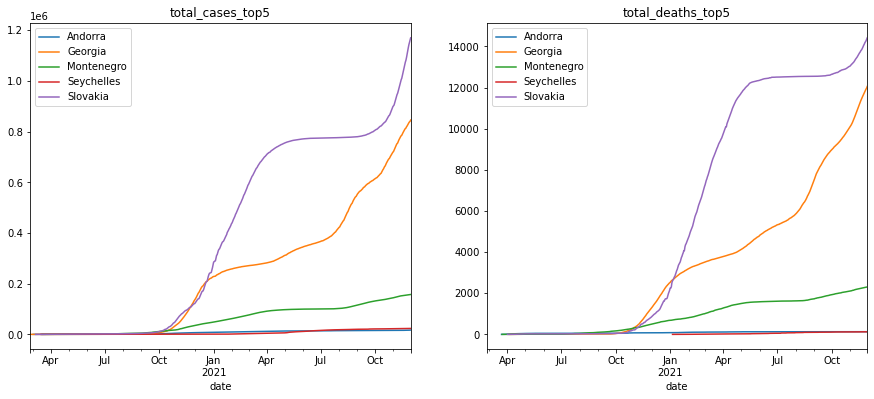

In [25]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('total_cases_top5')
covid_top5.groupby('location')['total_cases'].plot()
plt.legend()
plt.subplot(1,2,2)
plt.title('total_deaths_top5')
covid_top5.groupby('location')['total_deaths'].plot()
plt.legend()

### 2-2 코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화

- [인구수대비 확진자 비율, 확진자수대비 사망자비율, 확진자수의 상승정도] 이 세 가지 지표가 주요 지표라고 판단하엿다.
    - 확진자수의 상승정도는 (30일 전의 확진자 수/마지막날 확진자수)로 정의
- 따라서 마지막 날 기준으로 세가지 지표의 합을 위험지수라고 정의하였다.

In [30]:
covid = pd.read_csv('./data/problem2.csv',index_col='date',parse_dates=True)

In [31]:
covid['확진자/인구수'] = covid['total_cases']/covid['population']*100
covid['사망자/확진자'] = covid['total_deaths']/covid['total_cases']*100

In [32]:
covid_2020 = covid[covid.index.year == 2021]

In [33]:
new_group = covid_2020.groupby('location')

In [34]:
def last_day(sample):
    return sample[-1]
def day_30(sample):
    return sample[-30]

group_지표1 = new_group .resample('A').apply(last_day)['확진자/인구수']
group_지표2 = new_group .resample('A').apply(last_day)['사망자/확진자']

In [35]:
group_지표_3_30 = new_group.resample('A').apply(day_30)['total_cases']
group_지표_3_last = new_group.resample('A').apply(last_day)['total_cases'] 

In [36]:
covid_지표 = pd.concat([group_지표1,group_지표2, group_지표_3_30, group_지표_3_last],axis=1)
covid_지표.columns = ['확진자/인구수','사망자/확진자','total_cases_30', 'total_cases']
covid_지표['점수'] = covid_지표['확진자/인구수']+covid_지표['사망자/확진자'] +\
(covid_지표['total_cases_30']/covid_지표['total_cases'])

covid_지표

,,확진자/인구수,사망자/확진자,total_cases_30,total_cases,점수
location,date,,,,,
Afghanistan,2021-12-31,0.3948470191,4.6462244658,156284.0,157289.0,6.0346819726
Africa,2021-12-31,0.6299706751,2.5758960178,8503442.0,8652562.0,4.1886324911
Albania,2021-12-31,6.9596099319,1.5484258171,185497.0,199945.0,9.4357758775
Algeria,2021-12-31,0.4718666983,2.8836608385,206566.0,210531.0,4.3366942059
Andorra,2021-12-31,22.1255526540,0.7654104587,15516.0,17115.0,23.7975362941
...,...,...,...,...,...,...
Wallis and Futuna,2021-12-31,NaN,NaN,NaN,NaN,NaN
World,2021-12-31,3.3371255572,1.9845284369,247587799.0,262797494.0,6.2637778905
Yemen,2021-12-31,0.0328100700,19.4922031188,9799.0,10004.0,20.5045213855


In [37]:
covid_top_10 = covid_지표.sort_values('점수',ascending=False)[:11]
covid_top_10

,,확진자/인구수,사망자/확진자,total_cases_30,total_cases,점수
location,date,,,,,
Montenegro,2021-12-31,25.0578376597,1.4659160228,144692.0,157376.0,27.4431568951
Seychelles,2021-12-31,23.6750581337,0.5338002306,22265.0,23417.0,25.1596633350
Andorra,2021-12-31,22.1255526540,0.7654104587,15516.0,17115.0,23.7975362941
Georgia,2021-12-31,21.2485234711,1.4254242038,721388.0,845643.0,23.5270121477
Slovakia,2021-12-31,21.4293850305,1.2320970774,902044.0,1170200.0,23.4323281171
Czechia,2021-12-31,20.0478472156,1.5380629774,1765654.0,2150042.0,22.4071285692
Slovenia,2021-12-31,20.2479118189,1.2411558145,337108.0,420898.0,22.2899932734
Yemen,2021-12-31,0.0328100700,19.4922031188,9799.0,10004.0,20.5045213855
San Marino,2021-12-31,17.7565421935,1.5399900646,5547.0,6039.0,20.2150618159


In [38]:
str_top10 = ''
for i in covid_top_10.index.get_level_values(0).tolist():
    str_top10 +=i+'|'

In [39]:
str_top10

'Montenegro|Seychelles|Andorra|Georgia|Slovakia|Czechia|Slovenia|Yemen|San Marino|Serbia|Lithuania|'

In [40]:
contain_top10 = covid['location'].str.contains('Montenegro|Seychelles|Andorra|Georgia|Slovakia|Czechia|Slovenia|Yemen|San Marino|Serbia|Lithuania')
covid_top10 = covid[contain_top10]
covid_top10

,location,total_cases,total_deaths,new_tests,population,new_vaccinations,확진자/인구수,사망자/확진자
date,,,,,,,,
2020-03-02,Andorra,1.0,NaN,NaN,77354.0,NaN,0.0012927580,NaN
2020-03-03,Andorra,1.0,NaN,NaN,77354.0,NaN,0.0012927580,NaN
2020-03-04,Andorra,1.0,NaN,NaN,77354.0,NaN,0.0012927580,NaN
2020-03-05,Andorra,1.0,NaN,NaN,77354.0,NaN,0.0012927580,NaN
2020-03-06,Andorra,1.0,NaN,NaN,77354.0,NaN,0.0012927580,NaN
...,...,...,...,...,...,...,...,...
2021-11-26,Yemen,9979.0,1943.0,NaN,30490639.0,NaN,0.0327280776,19.4708888666
2021-11-27,Yemen,9981.0,1945.0,NaN,30490639.0,NaN,0.0327346370,19.4870253482
2021-11-28,Yemen,9987.0,1946.0,NaN,30490639.0,NaN,0.0327543152,19.4853309302


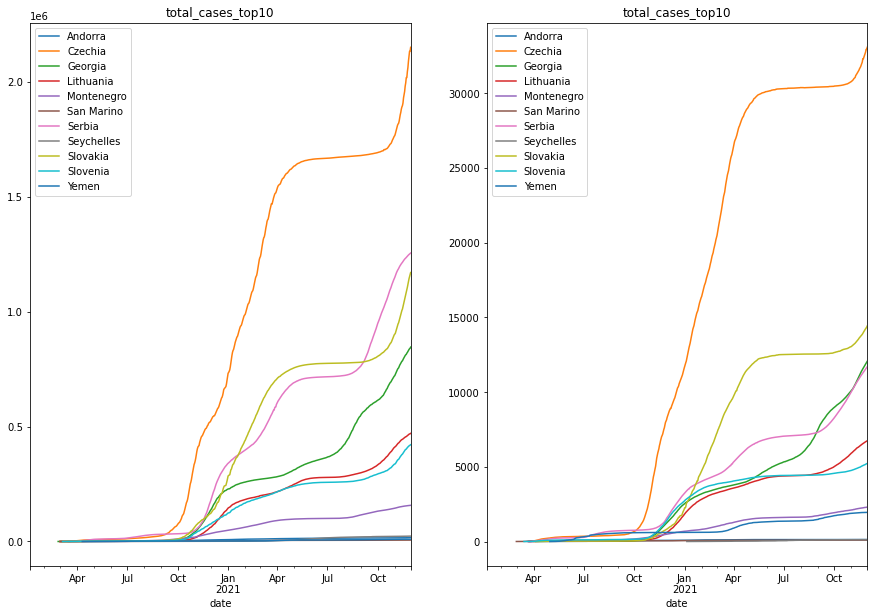

In [41]:
plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
plt.title('total_cases_top10')
covid_top10.groupby('location')['total_cases'].plot()
plt.legend()
plt.subplot(1,2,2)
plt.title('total_cases_top10')
covid_top10.groupby('location')['total_deaths'].plot()
plt.legend()

### 2-3 한국의 코로나 확진자 예측해라(선형 시계열모델 + 비선형시계열 모델 2개 만들어라)
누적 확진자, 누적 사망자를 Y로 두고, 모델을 만드는데 평가는 누적 확진자가 아닌 일일 확진자 or 일일 사망자로 하여라

In [320]:
covid = pd.read_csv('./data/problem2.csv',index_col='date',parse_dates=True)
covid

,location,total_cases,total_deaths,new_tests,population,new_vaccinations
date,,,,,,
2020-02-24,Afghanistan,5.0,NaN,NaN,39835428.0,NaN
2020-02-25,Afghanistan,5.0,NaN,NaN,39835428.0,NaN
2020-02-26,Afghanistan,5.0,NaN,NaN,39835428.0,NaN
2020-02-27,Afghanistan,5.0,NaN,NaN,39835428.0,NaN
2020-02-28,Afghanistan,5.0,NaN,NaN,39835428.0,NaN
...,...,...,...,...,...,...
2021-11-26,Zimbabwe,133836.0,4704.0,2719.0,15092171.0,31285.0
2021-11-27,Zimbabwe,133836.0,4704.0,4152.0,15092171.0,16111.0
2021-11-28,Zimbabwe,133951.0,4705.0,1044.0,15092171.0,8252.0


# 3번
설문조사 데이터      
데이터 출처 : 자체 제작    
데이터 경로 : /kaggle/input/adp-kr-p3/problem3.csv 

데이터 설명 : A ~ D까지의 그룹에게 각각 같은 설문조사를 하여 1-1,1-2,1-3...5-1,5-4 인 설문지를 푼 것이다. 문항은 영역별로 나뉘어 있고, 영역은 크게 5개이다(1~5)    
각 영역의 세부문항은 4개씩 존재한다 (1-1,1-2,1-3,1-4 ~) 이 때 중간에 반대 문항이 들어가 있다. 예를 들어 1-1 문제가 "나는 시간약속을 잘 지킨다."라는 문제라면 1-3의 문제는 "나는 시간약속을 잘 지키지 않는다." 라는 역문제로 구성 되어있다. 각 영역의 3번문항의 1번문항의 역문제이다. 
모든 답변은 5점 척도이다. 문제를 풀기전 모든 역문항의 경우 점수를 변환(6점을 빼서) 작업이 필요하다

### 3-1 각 그룹의 영역별 응답의 평균, 표준편차, 왜도, 첨도를 구하라.

### 3-2 그룹별로 Q1-1문항의 차이가 존재하는지 anova분석을 시행하라

### 3-3 탐색적 요인분석을 수행하고 결과를 시각화 하라